##importing main libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
df_housing  = pd.read_csv('housing.csv')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
df_housing.fillna(df_housing['total_bedrooms'].mean(), axis = 1 , inplace=True)

In [17]:
df_housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

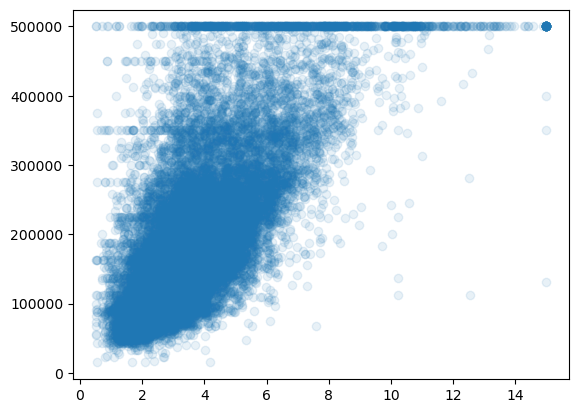

In [18]:
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], alpha=0.1)

In [19]:
df_housing["rooms_per_household"] = df_housing["total_bedrooms"]/df_housing["households"]
df_housing["bedrooms_per_rooms"] = df_housing["total_bedrooms"]/df_housing["total_rooms"]

In [20]:
x = df_housing.drop(['median_house_value', 'ocean_proximity'], axis = 1)
y = df_housing['median_house_value']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [24]:
x_train_norm = preprocessing.normalize(x_train)
y_train_norm = preprocessing.normalize(y_train.array.reshape(1, -1))
model = KMeans(n_clusters= 3, random_state = 0, n_init='auto')
model.fit(x_train,y_train)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [39]:
y_train_norm

array([[0.00436181, 0.01306747, 0.00738706, ..., 0.00797989, 0.01018595,
        0.01167701]])

In [33]:
k = range(2, 8)
fit = []
score  = []
for k in k:
    model = KMeans(n_clusters= k, random_state = 0, n_init='auto').fit(x_train_norm)
    fit.append(model)
    score.append(silhouette_score(x_train_norm, model.labels_, metric='euclidean'))

score

[0.5224491138939134,
 0.35489456860905116,
 0.36945876606269507,
 0.314675224746358,
 0.2789992138885417,
 0.29555247789269756]

<Axes: >

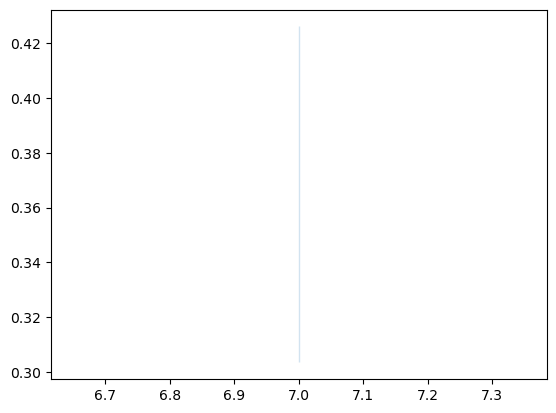